In [1]:
import sys
sys.path.insert(0, "../")
import vq2d.data
from detectron2_extensions.data.dataset_mapper import DatasetMapper
from detectron2.data.build import get_detection_dataset_dicts
from detectron2_extensions.config import get_cfg
import matplotlib.pyplot as plt

In [2]:
dataset_dicts = get_detection_dataset_dicts(["vq2d_val_pos_frame_only_vc"])
print(dataset_dicts[0].keys())

dict_keys(['file_name', 'height', 'width', 'image_id', 'annotations', 'visual_crop'])


In [3]:
cfg = get_cfg()
cfg.merge_from_file("/work/prannay/ego4d/ckpt/config.yaml")
mapper = DatasetMapper(cfg, is_train=False)

In [44]:
output = mapper(dataset_dicts[50])

In [45]:
dataset_dicts[12]

{'file_name': '/scratch/shared/beegfs/prannay/ego4d_data/images_val/d5935c29-1b8d-417d-9bbb-5ebd47e9256d/frame_0001305.png',
 'height': 1080,
 'width': 1920,
 'image_id': 13,
 'annotations': [{'iscrowd': 0,
   'bbox': [-0.37, 778.31, 130.34, 299.81],
   'category_id': 0,
   'visual_crop_id': 1,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}],
 'visual_crop': {'id': 1,
  'dataset_uid': 'val_0000000000',
  'bbox': [725.29, 611.46, 176.83, 185.12],
  'width': 1920,
  'height': 1080,
  'file_name': '/scratch/shared/beegfs/prannay/ego4d_data/images_val/d5935c29-1b8d-417d-9bbb-5ebd47e9256d/frame_0000001.png',
  'bbox_mode': <BoxMode.XYWH_ABS: 1>}}

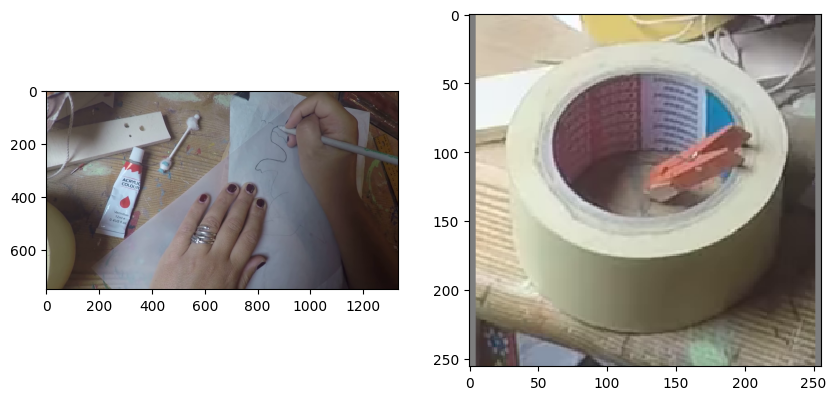

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(output["image"][[2, 1, 0]].permute(1, 2, 0).numpy())
ax[1].imshow(output["reference"][[2, 1, 0]].permute(1, 2, 0).byte().numpy(), interpolation="nearest")
plt.show()